In [2]:
class Chain:
    def __init__(self, cid):
        self.cid = cid
        self.res = []
        return
    
    def addres(self, res):
        self.res.append(res)
        return
    
    def printchain(self):
        print("chain: %s" % str(self.cid))
#         for res in self.res:
#             res.printme()

class Residue:
    def __init__(self, resid):
        self.resid = resid
        self.cid = list(self.resid)[2]
        self.atoms = []
        return

    def addatom(self, atom):
        self.atoms.append(atom)
        return

    def printme(self):
        print("residue: %s" % str(self.resid))
#         for atom in self.atoms:
#             atom.printline()
#         return

class Atom:
    def __init__(self, line):
        self.resName = ""
        self.xyz = (0, 0, 0)
        self.name = ""
        self.cid = ""
        self.seq = 0
        self.serial = 0
        self.loadline(line)
        self.resid = (self.resName, self.seq, self.cid)
        return

    def loadline(self, line):
        self.serial = int(line[6:11])
        self.name = line[12:16]
        self.resName = line[17:20]
        self.cid = line[21]
        self.seq = int(line[22:26])
        self.xyz = (float(line[30:38]), float(line[38:46]), float(line[46:54]))
        return

    def printline(self):
        print("ATOM  %5d %4s %3s %1s%4d    %8.3f%8.3f%8.3f" % (self.serial, self.name, self.resName, self.cid,
                                                             self.seq, self.xyz[0], self.xyz[1], self.xyz[2]))
        return

fname = '1fn3.pdb'
atomlines = [line for line in open(fname).readlines() if line[:6] == "ATOM  " or line[:6] == "HETATM"]

atoms = []
for x in atomlines:
    atoms.append(Atom(x))

residues = []
for atom in atoms:
    # is this atom belong to an existing residue,
    in_exisiting_residue = False
    existing_res = None
    for res in residues:
        if atom.resid == res.resid:
            existing_res = res
            in_exisiting_residue = True
            break
    if in_exisiting_residue:
        #if yes, add atom to that residue
        existing_res.addatom(atom)
    else:
        # if not, create a new Residue object and add this atom to the new residue
        new_res = Residue(atom.resid)
        new_res.addatom(atom)
        residues.append(new_res)

chains = []
for res in residues:
    in_existing_chain = False
    existing_chain = None
    for chain in chains:
        if res.cid == chain.cid:
            existing_chain = chain
            in_existing_chain = True
            break
    if in_existing_chain:
        existing_chain.addres(res)
    else:
        new_chain = Chain(res.cid)
        new_chain.addres(res)
        chains.append(new_chain)
        


no sequence skipped


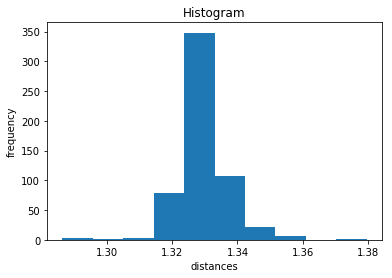

In [45]:
distances = []
for chain in chains:
    for res in chain.res:
        seq_skipped = False
        current_seq = res.resid[1]
        if current_seq != len(chain.res):
            next_res = chain.res[current_seq]
            if next_res.resid[1] != current_seq + 1:
                seq_skipped = True
                print('sequence skipped after', res.resid)
            for atom1 in res.atoms:  
                if 'C ' in atom1.name:
                    C_coord = atom1.xyz
                    for atom2 in next_res.atoms:
                        if 'N ' in atom2.name:
                            N_coord = atom2.xyz
                            distance = ((C_coord[0] - N_coord[0])**2 + (C_coord[1] - N_coord[1])**2 + (C_coord[2] - N_coord[2])**2)**.5
                            distances.append(distance)
if seq_skipped == False:
    print('no sequence skipped')
        

import matplotlib.pyplot as plt
import numpy as np

plt.hist(distances)
plt.title("Histogram")
plt.xlabel("distances")
plt.ylabel("frequency")

plt.show()

159
140


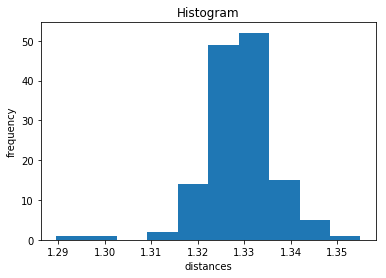

In [42]:
distances = []

for res in chains[0].res:
    current_seq = res.resid[1]
    if current_seq != len(chains[0].res):
        next_res = chains[0].res[current_seq]
        for atom1 in res.atoms:
            
            if 'C ' in atom1.name:
                cx = float(atom1.xyz[0])
                cy = float(atom1.xyz[1])
                cz = float(atom1.xyz[2])
                for atom2 in next_res.atoms:

                    if 'N ' in atom2.name:
                        
                        nx = float(atom2.xyz[0])
                        ny = float(atom2.xyz[1])
                        nz = float(atom2.xyz[2])
                        distance = ((cx - nx)**2 + (cy - ny)**2 + (cz - nz)**2)**.5
                        

                        distances.append(distance)

print(len(chains[0].res))
print(len(distances))

import matplotlib.pyplot as plt
import numpy as np

plt.hist(distances)
plt.title("Histogram")
plt.xlabel("distances")
plt.ylabel("frequency")

plt.show()